<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DATA" data-toc-modified-id="DATA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Target</a></span></li></ul></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression-with-StatsModels" data-toc-modified-id="Logistic-Regression-with-StatsModels-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Logistic Regression with StatsModels</a></span></li><li><span><a href="#Model-Performance-Evaluation" data-toc-modified-id="Model-Performance-Evaluation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Model Performance Evaluation</a></span></li><li><span><a href="#Model-Performance-Report" data-toc-modified-id="Model-Performance-Report-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Model Performance Report</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#'ga:dateHourMinute'" data-toc-modified-id="'ga:dateHourMinute'-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>'ga:dateHourMinute'</a></span><ul class="toc-item"><li><span><a href="#Month" data-toc-modified-id="Month-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Month</a></span><ul class="toc-item"><li><span><a href="#Month-as-Numerical-Feature" data-toc-modified-id="Month-as-Numerical-Feature-3.1.1.1"><span class="toc-item-num">3.1.1.1&nbsp;&nbsp;</span>Month as Numerical Feature</a></span></li><li><span><a href="#Month-as-Cyclical-Continuous-Feature" data-toc-modified-id="Month-as-Cyclical-Continuous-Feature-3.1.1.2"><span class="toc-item-num">3.1.1.2&nbsp;&nbsp;</span>Month as Cyclical Continuous Feature</a></span></li></ul></li><li><span><a href="#Day-of-week" data-toc-modified-id="Day-of-week-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Day of week</a></span><ul class="toc-item"><li><span><a href="#Day-of-Week-as-Numerical-Feature" data-toc-modified-id="Day-of-Week-as-Numerical-Feature-3.1.2.1"><span class="toc-item-num">3.1.2.1&nbsp;&nbsp;</span>Day of Week as Numerical Feature</a></span></li><li><span><a href="#Day-of-Week-as-Cyclical-Continuous-Feature" data-toc-modified-id="Day-of-Week-as-Cyclical-Continuous-Feature-3.1.2.2"><span class="toc-item-num">3.1.2.2&nbsp;&nbsp;</span>Day of Week as Cyclical Continuous Feature</a></span></li></ul></li><li><span><a href="#Hour" data-toc-modified-id="Hour-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Hour</a></span><ul class="toc-item"><li><span><a href="#Hour-as-Numerical-Feature" data-toc-modified-id="Hour-as-Numerical-Feature-3.1.3.1"><span class="toc-item-num">3.1.3.1&nbsp;&nbsp;</span>Hour as Numerical Feature</a></span></li><li><span><a href="#Hour-as-Cyclical-Continuous-Feature" data-toc-modified-id="Hour-as-Cyclical-Continuous-Feature-3.1.3.2"><span class="toc-item-num">3.1.3.2&nbsp;&nbsp;</span>Hour as Cyclical Continuous Feature</a></span></li></ul></li><li><span><a href="#Month-+-Day-of-Week-+-Hour" data-toc-modified-id="Month-+-Day-of-Week-+-Hour-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Month + Day of Week + Hour</a></span><ul class="toc-item"><li><span><a href="#Hour-as-Numerical-Feature" data-toc-modified-id="Hour-as-Numerical-Feature-3.1.4.1"><span class="toc-item-num">3.1.4.1&nbsp;&nbsp;</span>Hour as Numerical Feature</a></span></li><li><span><a href="#Hour-as-Cyclical-Continuous-Feature" data-toc-modified-id="Hour-as-Cyclical-Continuous-Feature-3.1.4.2"><span class="toc-item-num">3.1.4.2&nbsp;&nbsp;</span>Hour as Cyclical Continuous Feature</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from scipy import stats
import statsmodels.api as sm

## DATA

### Dataset

In [2]:
df=pd.read_csv('../data/dfjoin_Scount_daysSLS_srceMed_city_device_OS_2019_2020_jan21.csv')
print(df.shape)
df.head(3)

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(3936941, 15)


,Unnamed: 0,ga:productSKU,ga:dateHourMinute,ga:pagePath,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:city,ga:deviceCategory,ga:operatingSystem,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart
0,0,1008,201904301452,/parafarmacia/es/,1,1,0,(direct) / (none),Burgos,mobile,iOS,1,0,0,0
1,1,1008,201904301524,/parafarmacia/es/,3,1,0,(direct) / (none),Madrid,desktop,Windows,1,0,0,0
2,2,1008,201904301545,/parafarmacia/es/,7,33,0,merchants.google.com / referral,Zamudio,desktop,Windows,1,0,0,0


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
print(df.shape)
print("")
df.info()

(3936941, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936941 entries, 0 to 3936940
Data columns (total 14 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   ga:productSKU            object
 1   ga:dateHourMinute        int64 
 2   ga:pagePath              object
 3   ga:pageDepth             int64 
 4   ga:sessionCount          int64 
 5   ga:daysSinceLastSession  int64 
 6   ga:sourceMedium          object
 7   ga:city                  object
 8   ga:deviceCategory        object
 9   ga:operatingSystem       object
 10  ga:productListViews      int64 
 11  ga:productListClicks     int64 
 12  ga:productDetailViews    int64 
 13  ga:productAddsToCart     int64 
dtypes: int64(8), object(6)
memory usage: 420.5+ MB


### Target

In [4]:
df['ga:productAddsToCart_transf']=df["ga:productAddsToCart"].apply(lambda x: 1 if x>1 else x)

print("No. observations per class")
print(df['ga:productAddsToCart_transf'].value_counts())
print("")

print("% observations per class")
print(100*df['ga:productAddsToCart_transf'].value_counts(normalize=True))

No. observations per class
0    3864256
1      72685
Name: ga:productAddsToCart_transf, dtype: int64

% observations per class
0    98.15377
1     1.84623
Name: ga:productAddsToCart_transf, dtype: float64


## Functions

### Logistic Regression with StatsModels

In [5]:
def reg_log(X_train):
    X_train=sm.add_constant(X_train)
    rlog=sm.Logit(y_train,X_train)
    results_rlog=rlog.fit()
    print(results_rlog)
    return results_rlog, results_rlog.summary()

### Model Performance Evaluation

In [6]:
def evaluate(X_test, y_test, model):
    X_test=sm.add_constant(X_test)
    probabilities=model.predict(X_test)
    predictions=np.where(probabilities<0.5,0,1)
    print("ACCURACY: " + str(accuracy_score(y_test, predictions)))
    print("PRECISION: " + str(precision_score(y_test, predictions)))
    print("RECALL: " + str(recall_score(y_test, predictions)))
    print("F1 SCORE: " + str(f1_score(y_test, predictions)))
    print("AUC: " + str(roc_auc_score(y_test,probabilities)))
    tpr, fpr, thresolds = roc_curve(y_test, probabilities)
    plt.plot(tpr, fpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')


### Model Performance Report

In [7]:
def report(X_test,y_test, model):
    X_test=sm.add_constant(X_test)
    probabilities=model.predict(X_test)
    predictions=np.where(probabilities<0.5,0,1)
    confusion_matrix=pd.crosstab(y_test.ravel(),predictions,rownames=['Actual values'],colnames=['Predictions'])
    print(classification_report(y_test, predictions))
    return confusion_matrix


## Logistic Regression

### 'ga:dateHourMinute'

In [8]:
df['ga:dateHourMinute']

0          201904301452
1          201904301524
2          201904301545
3          201904301704
4          201904301452
               ...     
3936936    202101092123
3936937    202101092124
3936938    202101120607
3936939    202101131547
3936940    202101141618
Name: ga:dateHourMinute, Length: 3936941, dtype: int64

In [9]:
df['dateTime']=pd.to_datetime(df['ga:dateHourMinute'],format='%Y%m%d%H%M')
df['dateTime']

0         2019-04-30 14:52:00
1         2019-04-30 15:24:00
2         2019-04-30 15:45:00
3         2019-04-30 17:04:00
4         2019-04-30 14:52:00
                  ...        
3936936   2021-01-09 21:23:00
3936937   2021-01-09 21:24:00
3936938   2021-01-12 06:07:00
3936939   2021-01-13 15:47:00
3936940   2021-01-14 16:18:00
Name: dateTime, Length: 3936941, dtype: datetime64[ns]

In [10]:
df['dateTime_year']=df['dateTime'].dt.year
df['dateTime_month']=df['dateTime'].dt.month
df['dateTime_dayofweek']=df['dateTime'].dt.dayofweek
df['dateTime_hour']=df['dateTime'].dt.hour
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936941 entries, 0 to 3936940
Data columns (total 20 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   ga:productSKU                object        
 1   ga:dateHourMinute            int64         
 2   ga:pagePath                  object        
 3   ga:pageDepth                 int64         
 4   ga:sessionCount              int64         
 5   ga:daysSinceLastSession      int64         
 6   ga:sourceMedium              object        
 7   ga:city                      object        
 8   ga:deviceCategory            object        
 9   ga:operatingSystem           object        
 10  ga:productListViews          int64         
 11  ga:productListClicks         int64         
 12  ga:productDetailViews        int64         
 13  ga:productAddsToCart         int64         
 14  ga:productAddsToCart_transf  int64         
 15  dateTime                     datetime64[ns]
 16  

In [11]:
# DateTime as cyclical features:

df['month_sin']=np.sin((df.dateTime_month-1)*(2.*np.pi/12))
df['month_cos']=np.cos((df.dateTime_month-1)*(2.*np.pi/12))
# I substract minus 1 to 'df.dateTime_month' because its values are coded as 1 to 12 instead of 0 to 11

df['dayofweek_sin']=np.sin(df.dateTime_dayofweek*(2.*np.pi/7))
df['dayofweek_cos']=np.cos(df.dateTime_dayofweek*(2.*np.pi/7))

df['hour_sin']=np.sin(df.dateTime_hour*(2.*np.pi/24))
df['hour_cos']=np.cos(df.dateTime_hour*(2.*np.pi/24))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936941 entries, 0 to 3936940
Data columns (total 26 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   ga:productSKU                object        
 1   ga:dateHourMinute            int64         
 2   ga:pagePath                  object        
 3   ga:pageDepth                 int64         
 4   ga:sessionCount              int64         
 5   ga:daysSinceLastSession      int64         
 6   ga:sourceMedium              object        
 7   ga:city                      object        
 8   ga:deviceCategory            object        
 9   ga:operatingSystem           object        
 10  ga:productListViews          int64         
 11  ga:productListClicks         int64         
 12  ga:productDetailViews        int64         
 13  ga:productAddsToCart         int64         
 14  ga:productAddsToCart_transf  int64         
 15  dateTime                     datetime64[ns]
 16  

<AxesSubplot:>

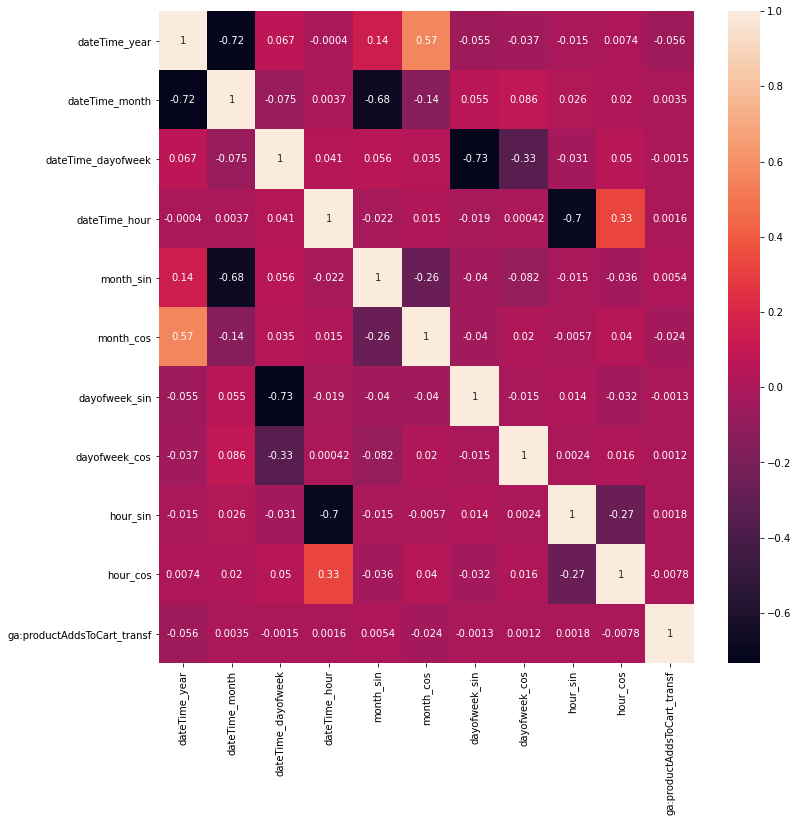

In [12]:
data=df[['dateTime_year','dateTime_month','dateTime_dayofweek', 'dateTime_hour', 'month_sin',
       'month_cos', 'dayofweek_sin', 'dayofweek_cos', 'hour_sin', 'hour_cos','ga:productAddsToCart_transf']]

corr= data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)

#### Month

##### Month as Numerical Feature

In [12]:
y=df['ga:productAddsToCart_transf']
X=df['dateTime_month']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [13]:
model_month, model_sum_month=reg_log(X_train)
model_sum_month

Optimization terminated successfully.
         Current function value: 0.091914
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                               
=======================================================================================
Dep. Variable:     ga:productAddsToCart_transf   No. Observations:              2952705
Model:                                   Logit   Df Residuals:                  2952703
Method:                                    MLE   Df Model:                            1
Date:                         Fri, 19 Mar 2021   Pseudo R-squ.:               8.355e-05
Time:                                 10:50:10   Log-Likelihood:            -2.7140e+05
converged:                                True   LL-Null:                   -2.7142e+05
Covariance Type:                     nonrobust   LLR p-value:                 1.645e-11
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.0213      0.008   -486.853      0.000      -4.038      -4.005
dateTime_month     0.0069      0.001      6.728      0.000       0.005       0.009
==================================================================================
"""

ACCURACY: 0.9814841155982915


/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PRECISION: 0.0
RECALL: 0.0
F1 SCORE: 0.0
AUC: 0.4991040924478943


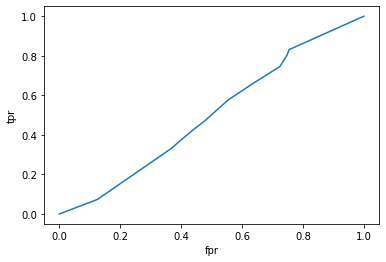

In [14]:
evaluate(X_test,y_test,model_month)

##### Month as Cyclical Continuous Feature

In [15]:
y=df['ga:productAddsToCart_transf']
X=df[['month_sin','month_cos']]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [16]:
model_month_cycl, model_sum_month_cycl=reg_log(X_train)
model_sum_month_cycl

Optimization terminated successfully.
         Current function value: 0.091629
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                               
=======================================================================================
Dep. Variable:     ga:productAddsToCart_transf   No. Observations:              2952705
Model:                                   Logit   Df Residuals:                  2952702
Method:                                    MLE   Df Model:                            2
Date:                         Fri, 19 Mar 2021   Pseudo R-squ.:                0.003189
Time:                                 10:52:06   Log-Likelihood:            -2.7055e+05
converged:                                True   LL-Null:                   -2.7142e+05
Covariance Type:                     nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9029      0.005   -855.409      0.000      -3.912      -3.894
month_sin     -0.0192      0.007     -2.934      0.003      -0.032      -0.006
month_cos     -0.2727      0.007    -41.218      0.000      -0.286      -0.260
==============================================================================
"""

ACCURACY: 0.9814841155982915


/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PRECISION: 0.0
RECALL: 0.0
F1 SCORE: 0.0
AUC: 0.552532450569327


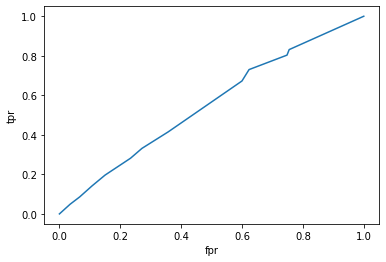

In [17]:
evaluate(X_test,y_test,model_month_cycl)

#### Day of week

##### Day of Week as Numerical Feature

In [18]:
y=df['ga:productAddsToCart_transf']
X=df[['dateTime_dayofweek']]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [19]:
model_dow, model_sum_dow=reg_log(X_train)
model_sum_dow

Optimization terminated successfully.
         Current function value: 0.091921
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                               
=======================================================================================
Dep. Variable:     ga:productAddsToCart_transf   No. Observations:              2952705
Model:                                   Logit   Df Residuals:                  2952703
Method:                                    MLE   Df Model:                            1
Date:                         Fri, 19 Mar 2021   Pseudo R-squ.:               8.937e-06
Time:                                 10:53:39   Log-Likelihood:            -2.7142e+05
converged:                                True   LL-Null:                   -2.7142e+05
Covariance Type:                     nonrobust   LLR p-value:                   0.02763
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9604      0.008   -517.347      0.000      -3.975      -3.945
dateTime_dayofweek    -0.0046      0.002     -2.203      0.028      -0.009      -0.001
======================================================================================
"""

ACCURACY: 0.9814841155982915


/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PRECISION: 0.0
RECALL: 0.0
F1 SCORE: 0.0
AUC: 0.5049882592953864


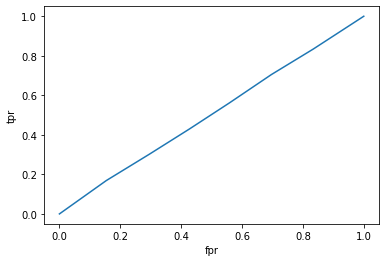

In [20]:
evaluate(X_test,y_test,model_dow)

##### Day of Week as Cyclical Continuous Feature

In [21]:
y=df['ga:productAddsToCart_transf']
X=df[['dayofweek_sin', 'dayofweek_cos']]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [22]:
model_dow_cycl, model_sum_dow_cycl=reg_log(X_train)
model_sum_dow_cycl

Optimization terminated successfully.
         Current function value: 0.091920
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                               
=======================================================================================
Dep. Variable:     ga:productAddsToCart_transf   No. Observations:              2952705
Model:                                   Logit   Df Residuals:                  2952702
Method:                                    MLE   Df Model:                            2
Date:                         Fri, 19 Mar 2021   Pseudo R-squ.:               1.973e-05
Time:                                 10:55:02   Log-Likelihood:            -2.7141e+05
converged:                                True   LL-Null:                   -2.7142e+05
Covariance Type:                     nonrobust   LLR p-value:                  0.004725
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.9754      0.004   -915.888      0.000      -3.984      -3.967
dayofweek_sin    -0.0158      0.006     -2.567      0.010      -0.028      -0.004
dayofweek_cos     0.0121      0.006      1.991      0.047       0.000       0.024
=================================================================================
"""

ACCURACY: 0.9814841155982915


/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PRECISION: 0.0
RECALL: 0.0
F1 SCORE: 0.0
AUC: 0.5023049550574441


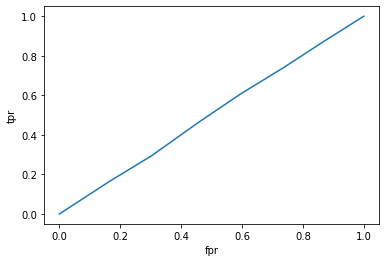

In [23]:
evaluate(X_test,y_test,model_dow_cycl)

#### Hour

##### Hour as Numerical Feature

In [24]:
y=df['ga:productAddsToCart_transf']
X=df[['dateTime_hour']]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [25]:
model_hour, model_sum_hour=reg_log(X_train)
model_sum_hour

Optimization terminated successfully.
         Current function value: 0.091920
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                               
=======================================================================================
Dep. Variable:     ga:productAddsToCart_transf   No. Observations:              2952705
Model:                                   Logit   Df Residuals:                  2952703
Method:                                    MLE   Df Model:                            1
Date:                         Fri, 19 Mar 2021   Pseudo R-squ.:               1.822e-05
Time:                                 10:57:09   Log-Likelihood:            -2.7141e+05
converged:                                True   LL-Null:                   -2.7142e+05
Covariance Type:                     nonrobust   LLR p-value:                  0.001660
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.0084      0.012   -342.741      0.000      -4.031      -3.985
dateTime_hour     0.0023      0.001      3.141      0.002       0.001       0.004
=================================================================================
"""

ACCURACY: 0.9814841155982915


/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PRECISION: 0.0
RECALL: 0.0
F1 SCORE: 0.0
AUC: 0.49738492056220157


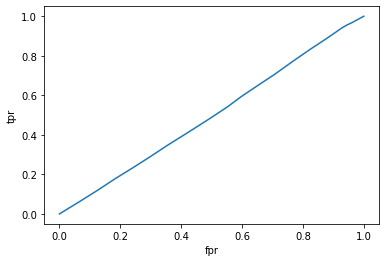

In [26]:
evaluate(X_test,y_test,model_hour)

##### Hour as Cyclical Continuous Feature

In [27]:
y=df['ga:productAddsToCart_transf']
X=df[['hour_sin', 'hour_cos']]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [28]:
model_hour_cycl, model_sum_hour_cycl=reg_log(X_train)
model_sum_hour_cycl

Optimization terminated successfully.
         Current function value: 0.091889
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                               
=======================================================================================
Dep. Variable:     ga:productAddsToCart_transf   No. Observations:              2952705
Model:                                   Logit   Df Residuals:                  2952702
Method:                                    MLE   Df Model:                            2
Date:                         Fri, 19 Mar 2021   Pseudo R-squ.:               0.0003620
Time:                                 10:57:53   Log-Likelihood:            -2.7132e+05
converged:                                True   LL-Null:                   -2.7142e+05
Covariance Type:                     nonrobust   LLR p-value:                 2.126e-43
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9901      0.005   -773.890      0.000      -4.000      -3.980
hour_sin      -0.0054      0.007     -0.724      0.469      -0.020       0.009
hour_cos      -0.0861      0.006    -13.591      0.000      -0.099      -0.074
==============================================================================
"""

ACCURACY: 0.9814841155982915


/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PRECISION: 0.0
RECALL: 0.0
F1 SCORE: 0.0
AUC: 0.5150940082664364


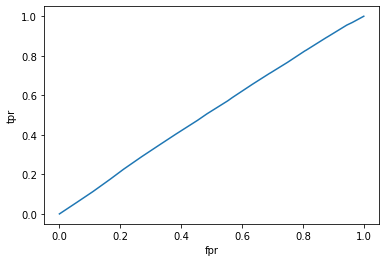

In [29]:
evaluate(X_test,y_test,model_hour_cycl)

#### Month + Day of Week + Hour

##### Hour as Numerical Feature

In [35]:
y=df['ga:productAddsToCart_transf']
X=df[['dateTime_month', 'dateTime_dayofweek', 'dateTime_hour']]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [36]:
model, model_sum=reg_log(X_train)
model_sum

Optimization terminated successfully.
         Current function value: 0.091912
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                               
=======================================================================================
Dep. Variable:     ga:productAddsToCart_transf   No. Observations:              2952705
Model:                                   Logit   Df Residuals:                  2952701
Method:                                    MLE   Df Model:                            3
Date:                         Fri, 19 Mar 2021   Pseudo R-squ.:               0.0001077
Time:                                 11:01:49   Log-Likelihood:            -2.7139e+05
converged:                                True   LL-Null:                   -2.7142e+05
Covariance Type:                     nonrobust   LLR p-value:                 1.252e-12
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.0433      0.015   -268.506      0.000      -4.073      -4.014
dateTime_month         0.0067      0.001      6.561      0.000       0.005       0.009
dateTime_dayofweek    -0.0038      0.002     -1.832      0.067      -0.008       0.000
dateTime_hour          0.0024      0.001      3.193      0.001       0.001       0.004
======================================================================================
"""

ACCURACY: 0.9814841155982915


/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PRECISION: 0.0
RECALL: 0.0
F1 SCORE: 0.0
AUC: 0.5045501241305833


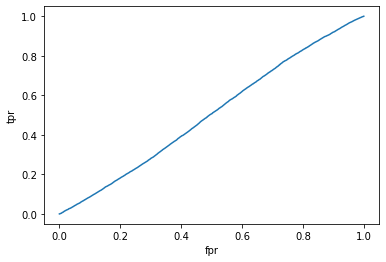

In [37]:
evaluate(X_test,y_test,model)

##### Hour as Cyclical Continuous Feature

In [32]:
y=df['ga:productAddsToCart_transf']
X=df[['month_sin','month_cos', 'dayofweek_sin', 'dayofweek_cos', 'hour_sin', 'hour_cos']]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [33]:
model, model_sum=reg_log(X_train)
model_sum

Optimization terminated successfully.
         Current function value: 0.091597
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                               
=======================================================================================
Dep. Variable:     ga:productAddsToCart_transf   No. Observations:              2952705
Model:                                   Logit   Df Residuals:                  2952698
Method:                                    MLE   Df Model:                            6
Date:                         Fri, 19 Mar 2021   Pseudo R-squ.:                0.003532
Time:                                 11:01:13   Log-Likelihood:            -2.7046e+05
converged:                                True   LL-Null:                   -2.7142e+05
Covariance Type:                     nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.9192      0.005   -726.746      0.000      -3.930      -3.909
month_sin        -0.0218      0.007     -3.305      0.001      -0.035      -0.009
month_cos        -0.2719      0.007    -40.989      0.000      -0.285      -0.259
dayofweek_sin    -0.0304      0.006     -4.912      0.000      -0.043      -0.018
dayofweek_cos     0.0176      0.006      2.881      0.004       0.006       0.030
hour_sin         -0.0042      0.007     -0.560      0.575      -0.019       0.010
hour_cos         -0.0773      0.006    -12.193      0.000      -0.090      -0.065
=================================================================================
"""

ACCURACY: 0.9814841155982915


/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PRECISION: 0.0
RECALL: 0.0
F1 SCORE: 0.0
AUC: 0.5558743612640854


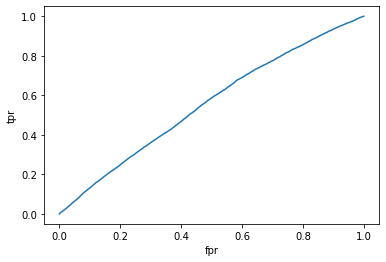

In [34]:
evaluate(X_test,y_test,model)